Connected to Python 3.12.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Convolution in the time domain can be done as a point-wise multiplication in the frequency domain.
Let's test this by multiplying two normal distributions in the frequency domain

In [2]:
def GaussianFT(A, k, sf, n, shift=None):
    """Generates a Discrete Fourier Transform for a gaussian in the form of y=A*e^-k*x^2

    Args:
        A (float): Amplitude of the gaussian
        k (float): x multiplier
        sf (int): Sampling Frequency
        n (_type_): FFT length
        shift (float): Circularly time shift the function by n sample points to the right

    Returns:
        (float, complex array) Frequency values, array of Fourier coefficients to be ifft (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
    """
    dt = 1/sf
    w = np.fft.fftfreq(n,dt)
    g = A*np.sqrt(np.pi/(k))*np.exp(-np.pi**2 * w**2 / k)*sf
    if shift!=None:
        g = g*np.exp(-1j*w*shift*dt*2*np.pi)
    return w, g

 Let's create two normal distributions with 1 and -2 mean, and a standard deviation of 1 and 0.5

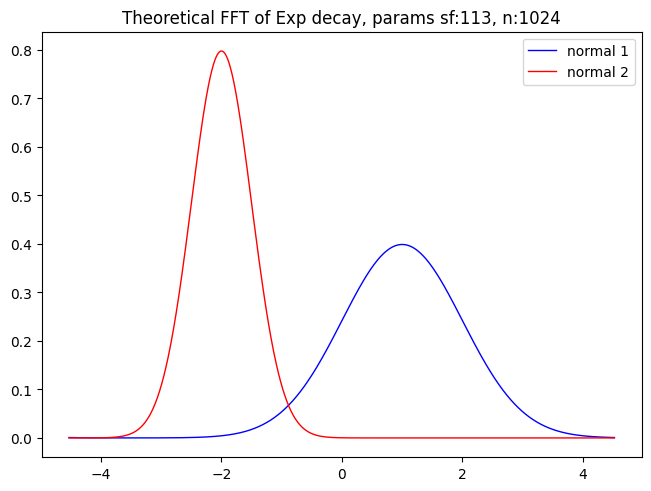

In [3]:
sf = 113
n = 1024
t = (np.arange(0, n)-(n/2))/sf

std1 = 1
std2 = 0.5
A1 = 1/(std1*np.sqrt(2*np.pi))
A2 = 1/(std2*np.sqrt(2*np.pi))
mu1 = 1
mu2 = -2
k1 = 1/(2*std1**2)
k2 = 1/(2*std2**2)

_, norm1FT = GaussianFT(A=A1, k = k1, sf=sf, n=n, shift=mu1*sf)
_, norm2FT = GaussianFT(A=A2, k = k2, sf=sf, n=n, shift=mu2*sf)



norm1 = np.fft.ifft(norm1FT)
norm2 = np.fft.ifft(norm2FT)

k=5*sf/n


fig, axs = plt.subplots(1,1, layout='constrained')

axs.plot(t, np.fft.fftshift(np.real(norm1)), c='b', linewidth=1, label = "normal 1")
axs.plot(t, np.fft.fftshift(np.real(norm2)), c='r', linewidth=1, label = "normal 2")
axs.set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}".format(sf, n))
axs.legend()

 We will then multiply these two gaussians in the frequency domain

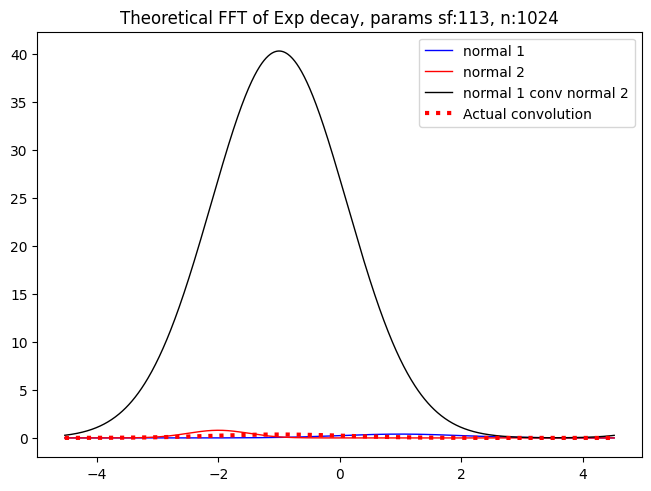

In [4]:
fig, axs = plt.subplots(1,1, layout='constrained')

stdN1N2Conv = np.sqrt(std1**2+std2**2)
muN1N2 = mu1 + mu2

A_N1N2 = 1/(stdN1N2Conv*np.sqrt(2*np.pi))
k_N1N2 = 1/(2*stdN1N2Conv**2)

n1n2ConvFT = norm1FT*norm2FT
N1N2Conv = np.fft.ifft(n1n2ConvFT)

axs.plot(t, np.fft.fftshift(np.real(norm1)), c='b', linewidth=1, label = "normal 1")
axs.plot(t, np.fft.fftshift(np.real(norm2)), c='r', linewidth=1, label = "normal 2")

axs.plot(t, np.fft.fftshift(np.real(N1N2Conv)), c='k', linewidth=1, label = "normal 1 conv normal 2")
axs.plot(t, A_N1N2*np.exp(-k_N1N2*((t-muN1N2)**2)), c='r', linewidth=3, linestyle='dotted', label = "Actual convolution")
axs.set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}".format(sf, n))
axs.legend()

 and to get the correct convolution integral, divide it by the sampling frequency (Carl Sandrock, https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Convolution.html, 2024)

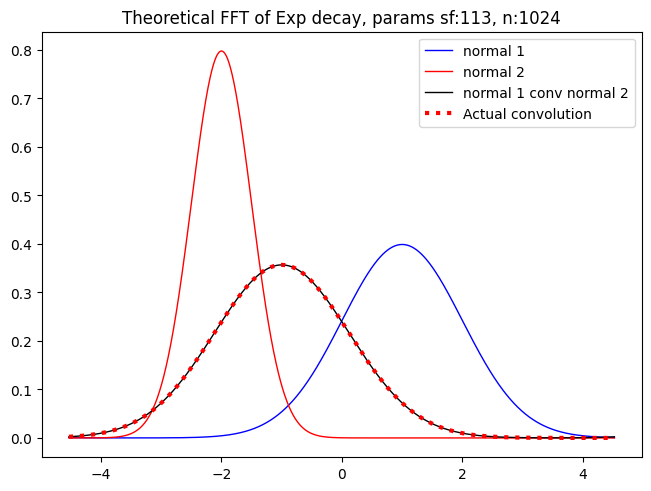

In [5]:
fig, axs = plt.subplots(1,1, layout='constrained')
n1n2ConvFT /= sf
N1N2Conv = np.fft.ifft(n1n2ConvFT)

axs.plot(t, np.fft.fftshift(np.real(norm1)), c='b', linewidth=1, label = "normal 1")
axs.plot(t, np.fft.fftshift(np.real(norm2)), c='r', linewidth=1, label = "normal 2")

axs.plot(t, np.fft.fftshift(np.real(N1N2Conv)), c='k', linewidth=1, label = "normal 1 conv normal 2")
axs.plot(t, A_N1N2*np.exp(-k_N1N2*((t-muN1N2)**2)), c='r', linewidth=3, linestyle='dotted', label = "Actual convolution")
axs.set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}".format(sf, n))
axs.legend()

 From the exploratory test, build a test function and plot test function

In [6]:
def convFT(fft1, fft2, sf):
    """Convolves two functions in the frequency domain

    Args:
        fft1 (complex array): Array of Fourier coefficients for function 1 (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
        fft2 (complex array): Array of Fourier coefficients for function 2 (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
        sf (float): Sampling Frequency

    Returns:
        (complex array): Array of Fourier coefficients to be ifft (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
    """
    return fft1*fft2/sf

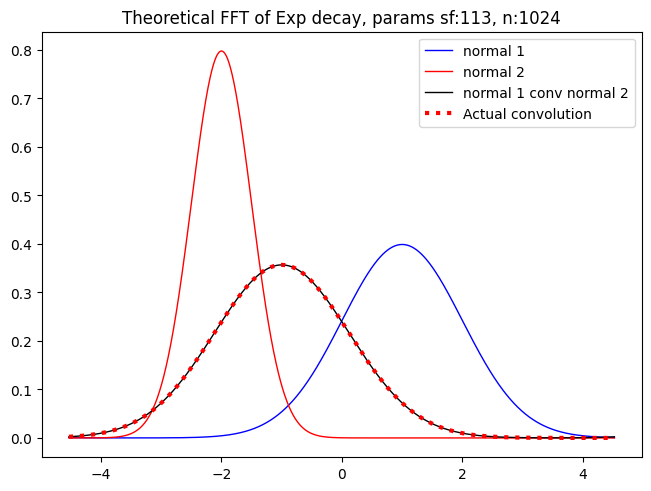

In [7]:
fig, axs = plt.subplots(1,1, layout='constrained')

n1n2ConvFT = convFT(norm1FT,norm2FT, sf=sf)
N1N2Conv = np.fft.ifft(n1n2ConvFT)

axs.plot(t, np.fft.fftshift(np.real(norm1)), c='b', linewidth=1, label = "normal 1")
axs.plot(t, np.fft.fftshift(np.real(norm2)), c='r', linewidth=1, label = "normal 2")

axs.plot(t, np.fft.fftshift(np.real(N1N2Conv)), c='k', linewidth=1, label = "normal 1 conv normal 2")
axs.plot(t, A_N1N2*np.exp(-k_N1N2*((t-muN1N2)**2)), c='r', linewidth=3, linestyle='dotted', label = "Actual convolution")
axs.set_title("Theoretical FFT of Exp decay, params sf:{}, n:{}".format(sf, n))
axs.legend()

 The following is the final function developed from this exploratory process

In [8]:
def convFT(fft1, fft2, sf):
    """Convolves two functions in the frequency domain.

    Args:
        fft1 (complex array): Array of Fourier coefficients for function 1 (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
        fft2 (complex array): Array of Fourier coefficients for function 2 (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
        sf (float): Sampling Frequency

    Returns:
        (complex array): Array of Fourier coefficients to be ifft (freq index: 0, 1, ...,   n/2-1,     -n/2, ..., -1)
    """
    
    return fft1*fft2/sf